# Model Identification

Now that we have determined the order of differencing (which is 1), now we must identify the **autoregressive order (AR) p** and the **moving average (MA) order q** for the ARIMA model.

- Autogressive order: indicates that the evolving variable of interest is determined by order p before. 
    - For example, in order to determine your future behaviour, you would look at your behaviour p days before to predict this.
- Moving average order: The order by which you use past predictions to correct future predictions. 
    - For example, if you predicted your mood to be 5 yesterday, but it was actually 6, your error would be +1. You carry this over to future predictions

## ACF and PACF

We can use the autocorrelation function and partial autocorrelation function to determine the orders p and q.

In [22]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd

In [23]:
#Importing differenced data
btc_diff_data = pd.read_csv('data/btc_data_diff.csv')

In [24]:
#Drop every column except closing prices
btc_diff_data['Date'] = pd.to_datetime(btc_diff_data['Date'])
btc_diff_data.set_index('Date', inplace=True)
btc_diff_data = btc_diff_data.dropna().astype(float)
btc_diff_data = btc_diff_data['Close']

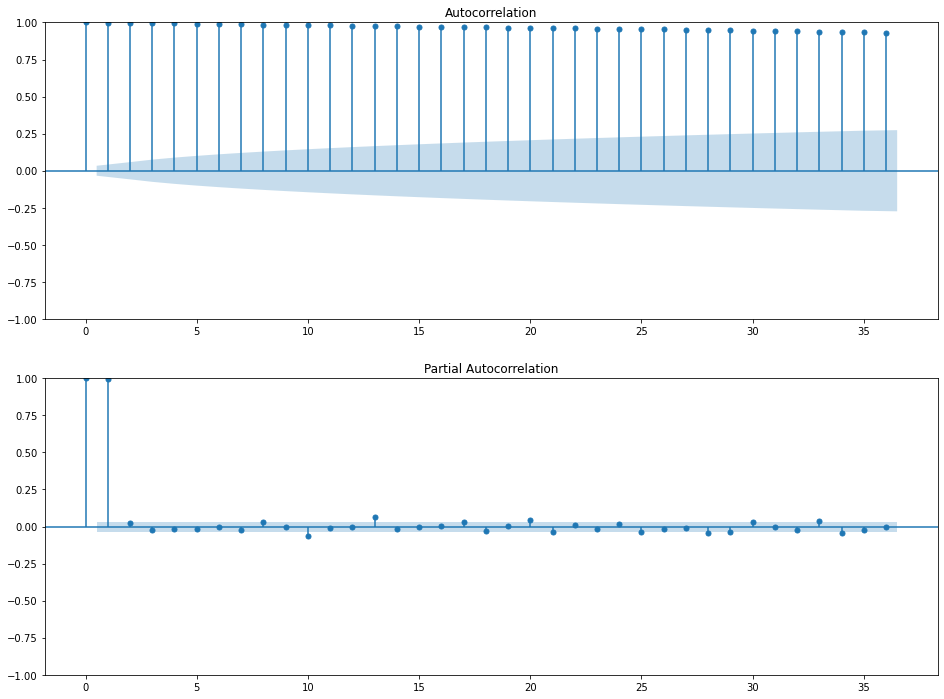

In [25]:
#Plots for ACF and PACF
fig, ax = plt.subplots(2, figsize=(16, 12))
plot_acf(btc_diff_data, ax=ax[0])
plot_pacf(btc_diff_data, ax=ax[1])
plt.show()

The ACF plot shows a gradual drop around 1, suggesting that the time series is more autoregressive in nature. The PACF plot shows a sharp spike and drop, indicative of an autoregressive process. Given this we consider the parameters to be:
- AR(p): **1**, this is because of the significant spike lag in the PACF plot
- MA(q): **0 then test with 1**, this is because the ACF plot doesn't show a strong average moving component, so initially test with 0 then 1.
- Differencing(d): As shown in data analysis, the differencing order is **1**.

Now that we have the relevant parameters, we can input these into the ARIMA model

In [33]:
btc_data = pd.read_csv('data/btc_data.csv')

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=44123.139, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=44142.626, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=44133.070, Time=0.40 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=44134.503, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=44141.648, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=44141.468, Time=0.96 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=44139.785, Time=0.90 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=44123.142, Time=4.35 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=44127.091, Time=4.14 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=44150.692, Time=0.32 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=44133.720, Time=3.38 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=44130.801, Time=4.82 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=44126.342, Time=4.26 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=44121.073, Time=0.90 sec
 ARIM

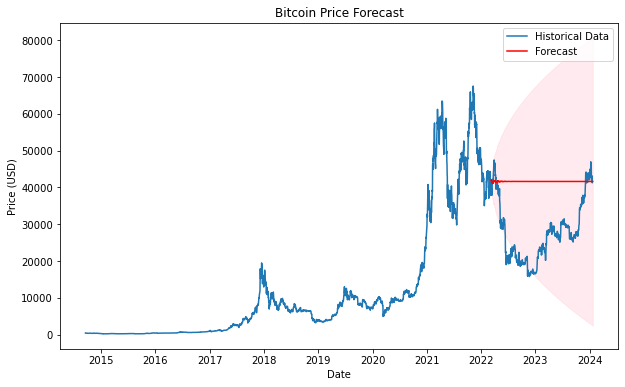

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm

# Load your data
btc_data['Date'] = pd.to_datetime(btc_data['Date'])
btc_data.set_index('Date', inplace=True)

# Split the data into train and test sets
train_size = int(len(btc_data) * 0.8)
train, test = btc_data[:train_size], btc_data[train_size:]

# Use pmdarima to find the best ARIMA model
model = pm.auto_arima(train['Close'], error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=True, m=12)

# Print model summary
print(model.summary())

# Forecast the next n periods where n is the number of observations in the test set
forecast, conf_int = model.predict(n_periods=len(test), return_conf_int=True)

# Create a range of dates for the forecast
forecast_dates = pd.date_range(start=test.index[0], periods=len(test), freq='D')

# Plot the historical data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(btc_data['Close'], label='Historical Data')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.fill_between(forecast_dates, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.title('Bitcoin Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()